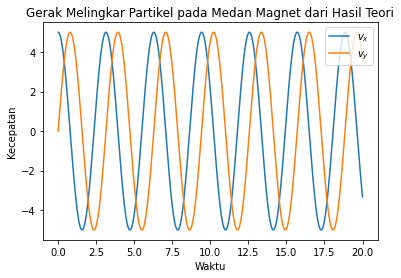

In [2]:
# Hasil yang diperoleh secara teori
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 20, 0.001)
k = 2
vx = 5*np.cos(k*t)
vy = 5*np.sin(k*t)

plt.plot(t, vx, t, vy)
plt.title('Gerak Melingkar Partikel pada Medan Magnet dari Hasil Teori')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_x$', '$v_y$'], loc=1)

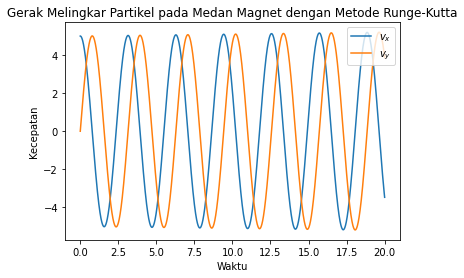

In [3]:
# Hasil yang diperoleh dari hasil numerik menggunakan metode Runge-Kutta orde 4
import matplotlib.pyplot as plt
import numpy as np

q = 4
Bz = 1
m = 2
def rk4(F,x,y,t,h):
  k0 = h*F(x,y,t)
  k1 = h*F(x+0.5*k0, y, t+0.5*h)
  k2 = h*F(x+0.5*k1, y, t+0.5*h)
  k3 = h*F(x+k2, y, t+h)
  return (k0 + 2*k1 + 2*k2 + k3)/6

def vx_dot(vx,vy,t):
  vx_dot = -q*Bz*vy/m
  return vx_dot

def vy_dot(vy,vx,t):
  vy_dot = q*Bz*vx/m
  return vy_dot

vx_init = 5
vy_init = 0
t_init = 0
t_final = 20
h = 0.001

vxs = [vx_init]
vys = [vy_init]
ts = [t_init]

while ts[-1] < t_final :
  h = min(h, t_final - ts[-1])
  vx = vxs[-1] + rk4(vx_dot, vxs[-1], vys[-1], ts[-1], h)
  vy = vys[-1] + rk4(vy_dot, vys[-1], vxs[-1], ts[-1], h)
  t = ts[-1] + h
  ts.append(t)
  vxs.append(vx)
  vys.append(vy)

plt.figure()
plt.plot(ts,vxs,ts,vys)
plt.title('Gerak Melingkar Partikel pada Medan Magnet dengan Metode Runge-Kutta')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_x$', '$v_y$'], loc=1)

plt.show()